# Stöße

## Simulation des schrägen Stoßes zweier kugelförmiger Objekte.

In diesem Programm wird eine elastische Kraft zwischen zwei Körpern angenommen, die anfängt zu wirken, sobald sich die Körper berühren. Die Bewegung wird über die Newtonsche Bewegungsgleichung mit solve_ivp gelöst.

Nach dem Ausführen der Zelle kann hier interaktiv die Federkonstate D, sowie die Masse m1 verändert werden.

&copy; Physik mit Python, Oliver Natt, Springer, 2022. <br>
TUM-Studierende haben Zugang zu dem Buch über www.ub.tum.de. 

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.animation
import scipy.integrate

from ipywidgets import interact, interactive, fixed, interact_manual, FloatSlider, IntSlider
%matplotlib widget

D = 5e3

def set_spring_constant(k):
    global D
    D = k

def set_mass(m):
    global m1
    m1 = m

# Simulationszeit und Zeitschrittweite [s].
t_max = 8
dt = 0.02

# Federkonstante beim Aufprall [N/m].

# Massen der beiden Teilchen [kg].
m1 = 4.0
m2 = 8.0

# Radien der beiden Teilchen [m].
radius1 = 0.1
radius2 = 0.3
# Anfangspositionen [m].
r0_1 = np.array([-2.0, 0.1])
r0_2 = np.array([0.0, 0.0])
# Anfangsgeschwindigkeiten [m/s].
v0_1 = np.array([1.0, 0.0])
v0_2 = np.array([0.0, 0.0])

# Define sliders to change all values
interact(set_spring_constant, k = IntSlider(description='Federkonst.:', value=5e3, min=10, max=1e4, step=50, orientation='horizontal'), continuous_update=False)
interact(set_mass, m = IntSlider(description='Masse:', value=2, min=1, max=10, step=1, orientation='horizontal'), continuous_update=False)

interactive(children=(IntSlider(value=5000, description='Federkonst.:', max=10000, min=10, step=50), Output())…

interactive(children=(IntSlider(value=2, description='Masse:', max=10, min=1), Output()), _dom_classes=('widge…

<function __main__.set_mass(m)>

Mit den gegebenen Parametern können wir nun die DGL lösen und animieren.

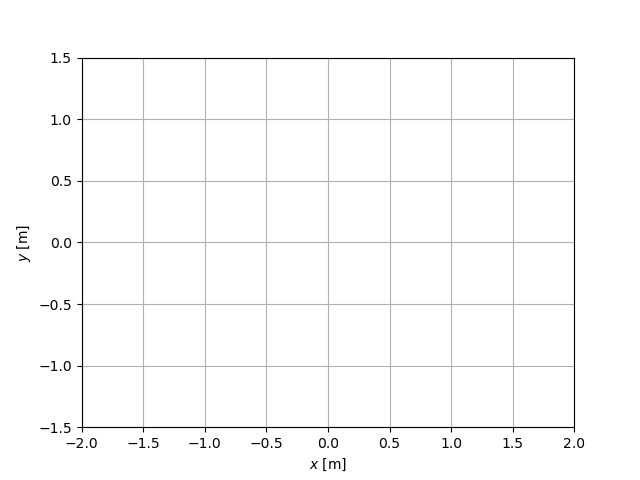

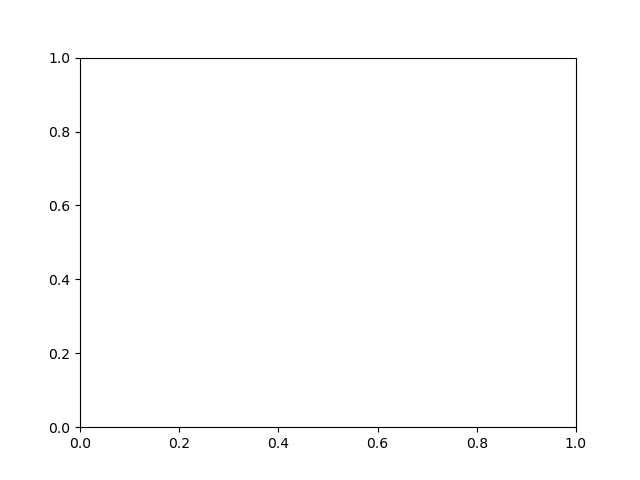

In [2]:
def dgl(t, u):
    """Berechne die rechte Seite der Differentialgleichung."""
    r1, r2, v1, v2 = np.split(u, 4)

    # Berechne den Abstand der Mittelpunkte.
    dr = np.linalg.norm(r1 - r2)

    # Berechne, wie weit die Kugeln ineinander eingedrungen sind.
    federweg = max(radius1 + radius2 - dr, 0)

    # Die Kraft soll proportional zum Federweg sein.
    F = D * federweg

    # Berechne die Vektoren der Beschleunigung. Der
    # Beschleunigungsvektor ist jeweils parallel zur
    # Verbindungslinie der beiden Kugelmittelpunkte.
    richtungsvektor = (r1 - r2) / dr
    a1 = F / m1 * richtungsvektor
    a2 = -F / m2 * richtungsvektor

    # Gib die Zeitableitung des Zustandsvektors zurück.
    return np.concatenate([v1, v2, a1, a2])


# Lege den Zustandsvektor zum Zeitpunkt t=0 fest.
u0 = np.concatenate((r0_1, r0_2, v0_1, v0_2))

# Löse die Bewegungsgleichung bis zum Zeitpunkt t_max.
result = scipy.integrate.solve_ivp(dgl, [0, t_max], u0,
                                   max_step=dt,
                                   t_eval=np.arange(0, t_max, dt))
t = result.t
r1, r2, v1, v2 = np.split(result.y, 4)

# Berechne Energie und Gesamtimpuls vor und nach dem Stoß und
# gib diese Werte aus.
E_anfang = 1/2 * (m1 * np.sum(v1[:, 0] ** 2) +
                  m2 * np.sum(v2[:, 0] ** 2))
E_ende = 1/2 * (m1 * np.sum(v1[:, -1] ** 2) +
                m2 * np.sum(v2[:, -1] ** 2))
p_anfang = m1 * v1[:, 0] + m2 * v2[:, 0]
p_ende = m1 * v1[:, -1] + m2 * v2[:, -1]

# Erstelle eine Figure und eine Axes mit Beschriftung.
plt.cla()
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('$x$ [m]')
ax.set_ylabel('$y$ [m]')
ax.set_xlim(-2.0, 2.0)
ax.set_ylim(-1.5, 1.5)
ax.set_aspect('equal')
ax.grid()

# Lege die Linienplots für die Bahnkurve an.
plot_bahn1, = ax.plot([], [], '-r', zorder=4)
plot_bahn2, = ax.plot([], [], '-b', zorder=3)

# Erzeuge zwei Kreise für die Darstellung der Körper.
kreis1 = mpl.patches.Circle([0, 0], radius1, visible=False,
                            color='red', zorder=4)
kreis2 = mpl.patches.Circle([0, 0], radius2, visible=False,
                            color='blue', zorder=3)
ax.add_patch(kreis1)
ax.add_patch(kreis2)


def update(n):
    """Aktualisiere die Grafik zum n-ten Zeitschritt."""
    # Aktualisiere die Position der beiden Körper.
    kreis1.set_center(r1[:, n])
    kreis2.set_center(r2[:, n])
    kreis1.set_visible(True)
    kreis2.set_visible(True)

    # Plotte die Bahnkurve bis zum aktuellen Zeitpunkt.
    plot_bahn1.set_data(r1[0, :n + 1], r1[1, :n + 1])
    plot_bahn2.set_data(r2[0, :n + 1], r2[1, :n + 1])
    return kreis1, kreis2, plot_bahn1, plot_bahn2

# Erstelle die Animation und starte sie.
ani = mpl.animation.FuncAnimation(fig, update, frames=t.size, interval=50, blit=True, repeat=False)
plt.show()

## Simulation von Mehrteilchen-Stößen über Differentialgleichungen

Analog lassen sich mit einer Schleife über die einzelnen Teilchen auch Stöße mit mehreren Teilchen lösen

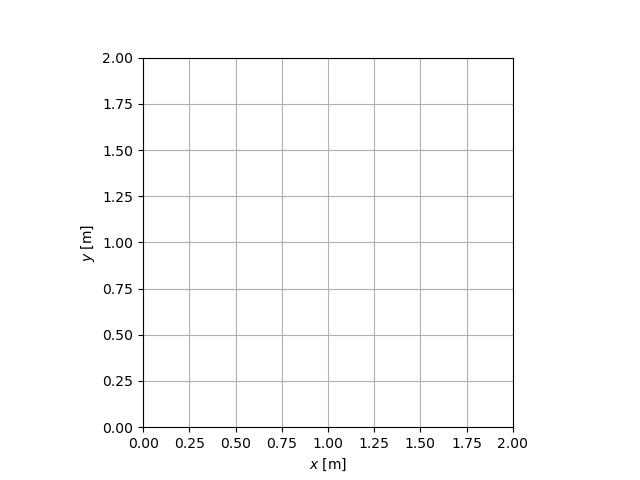

In [3]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.animation
import scipy.integrate

# Anzahl der Raumdimensionen und Anzahl der Teilchen.
n_dim = 2
n_teilchen = 10

# Simulationszeit und Zeitschrittweite [s].
t_max = 10
dt = 0.02

# Federkonstante beim Aufprall [N/m].
D = 5e3

# Positioniere die Massen zufällig im Bereich
# x=0,5 ... 1,5 und y = 0,5 ... 1,5 [m].
r0 = 0.5 + np.random.rand(n_teilchen, n_dim)

# Wähle zufällige Geschwindigkeiten
v0 = 0.2*(-0.5 + np.random.rand(n_teilchen, n_dim))

# Wähle zufällige Radien im Bereich von 0,02 bis 0,04 [m].
radien = 0.02 + 0.02 * np.random.rand(n_teilchen)

# Wähle zufällige Massen im Bereich von 0,2 bis 2,0 [kg].
m = 0.2 + 1.8 * np.random.rand(n_teilchen)


def dgl(t, u):
    """Berechne die rechte Seite der Differentialgleichung."""
    r, v = np.split(u, 2)
    r = r.reshape(n_teilchen, n_dim)
    a = np.zeros((n_teilchen, n_dim))
    for i in range(n_teilchen):
        for j in range(i):
            # Berechne den Abstand der Mittelpunkte.
            dr = np.linalg.norm(r[i] - r[j])
            # Berechne die Eindringtiefe.
            federweg = max(radien[i] + radien[j] - dr, 0)
            # Die Kraft soll proportional zum Federweg sein.
            F = D * federweg
            richtungsvektor = (r[i] - r[j]) / dr
            a[i] += F / m[i] * richtungsvektor
            a[j] -= F / m[j] * richtungsvektor
    return np.concatenate([v, a.reshape(-1)])


# Lege den Zustandsvektor zum Zeitpunkt t=0 fest.
u0 = np.concatenate((r0.reshape(-1), v0.reshape(-1)))

# Löse die Bewegungsgleichung bis zum Zeitpunkt t_max.
result = scipy.integrate.solve_ivp(dgl, [0, t_max], u0,
                                   max_step=dt,
                                   t_eval=np.arange(0, t_max, dt))
t = result.t
r, v = np.split(result.y, 2)

# Wandle r und v in ein 3-dimensionales Array um:
#    1. Index - Teilchen
#    2. Index - Koordinatenrichtung
#    3. Index - Zeitpunkt
r = r.reshape(n_teilchen, n_dim, -1)
v = v.reshape(n_teilchen, n_dim, -1)

# Erzeuge eine Figure und eine Axes.
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('$x$ [m]')
ax.set_ylabel('$y$ [m]')
ax.set_xlim(0, 2)
ax.set_ylim(0, 2)
ax.set_aspect('equal')
ax.grid()

# Erzeuge für jedes Teilchen einen Kreis.
kreise = []
for radius in radien:
    kreis = mpl.patches.Circle([0, 0], radius, visible=False)
    ax.add_patch(kreis)
    kreise.append(kreis)


def update(n):
    """Aktualisiere die Grafik zum n-ten Zeitschritt."""
    for kreis, ort in zip(kreise, r):
        kreis.set_center(ort[:, n])
        kreis.set_visible(True)
    return kreise


# Erstelle die Animation und starte sie.
ani = mpl.animation.FuncAnimation(fig, update, frames=t.size, interval=30, blit=True)
plt.show()

# Copyright

&copy; Physik mit Python, Oliver Natt, Springer, 2022. <br>
TUM-Studierende haben Zugang zu dem Buch über www.ub.tum.de. 

Copyright (c) 2023 Springer Nature Code Inside

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.